In [1]:
from sentence_transformers import SentenceTransformer

In [2]:
model = SentenceTransformer('jhgan/ko-sroberta-multitask')

In [3]:
# 크롤링
import requests
import time
def get_reviews(appid, params={'json':1}):
        url = 'https://store.steampowered.com/appreviews/'
        response = requests.get(url=url+str(appid), params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()

#https://partner.steamgames.com/doc/store/getreviews 참고    
def get_n_reviews(appid, n=100):#appid는 해당게임의 상점번호
    reviews = []
    cursor = '*'
    params = {
        'json' : 1,
        'filter' : 'all',#필터 없이
        'language' : 'koreana',#한국어로된 리뷰
        'day_range' : 9223372036854775807,#전체기간의 리뷰
        'review_type' : 'all',
        'purchase_type' : 'all'
    }

    while n > 0:
        time.sleep(2)#2초씩 쉬면서 크롤링
        params['cursor'] = cursor.encode()
        params['num_per_page'] = min(100, n)
        n -= 100

        response = get_reviews(appid, params)
        cursor = response['cursor']
        reviews += response['reviews']

        if len(response['reviews']) < 100: break

    return reviews

In [4]:
reviews = get_n_reviews(960170, 5000)# (크롤링할 게임번호, 리뷰 갯수)

reviews[:5]#맛보기로 5개 만가져옴

[{'recommendationid': '61227217',
  'author': {'steamid': '76561198004047082',
   'num_games_owned': 485,
   'num_reviews': 3,
   'playtime_forever': 1830,
   'playtime_last_two_weeks': 0,
   'playtime_at_review': 217,
   'last_played': 1641227297},
  'language': 'koreana',
  'review': '호랑이는 죽어서 가죽을 남기고 요구르팅은 죽어서 Always를 남겼다',
  'timestamp_created': 1578073275,
  'timestamp_updated': 1578073459,
  'voted_up': True,
  'votes_up': 245,
  'votes_funny': 135,
  'weighted_vote_score': '0.937551975250244141',
  'comment_count': 11,
  'steam_purchase': True,
  'received_for_free': False,
  'written_during_early_access': True},
 {'recommendationid': '107491414',
  'author': {'steamid': '76561199129345701',
   'num_games_owned': 120,
   'num_reviews': 40,
   'playtime_forever': 600,
   'playtime_last_two_weeks': 0,
   'playtime_at_review': 182,
   'last_played': 1648198773},
  'language': 'koreana',
  'review': "저는 오른팔에 장애가 있어서 한손으로 하는 사람입니다. \n남은 한 손도 완전하지가 않죠. \n그래서 에어모드만 합니다. 지금까지 곡 클리어? 못해봤

In [5]:
import pandas as pd

df = pd.DataFrame.from_dict(reviews)

df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,61227217,"{'steamid': '76561198004047082', 'num_games_ow...",koreana,호랑이는 죽어서 가죽을 남기고 요구르팅은 죽어서 Always를 남겼다,1578073275,1578073459,True,245,135,0.937551975250244141,11,True,False,True
1,107491414,"{'steamid': '76561199129345701', 'num_games_ow...",koreana,저는 오른팔에 장애가 있어서 한손으로 하는 사람입니다. \n남은 한 손도 완전하지가...,1641521599,1641550796,True,485,11,0.933813810348510742,30,True,False,False
2,86521951,"{'steamid': '76561198104975826', 'num_games_ow...",koreana,3가지만 생각하지말자\n'여기만 넘으면 맥스콤보다'\n'내가 어떻게 치고있지?'\n...,1613199959,1613199959,True,169,95,0.926471471786499023,6,True,False,False
3,84667290,"{'steamid': '76561198877073446', 'num_games_ow...",koreana,이 게임을 두가지를 알려줍니다.\n학교다닐때 왜 전교에서 놀던 친구들이 1개를 틀리...,1610626622,1610626622,True,170,137,0.924323618412017822,7,False,False,False
4,74988413,"{'steamid': '76561198852723178', 'num_games_ow...",koreana,1000시간해도 여전히 뉴비인겜,1598508531,1622003330,True,148,48,0.909993290901184082,4,True,False,False


In [6]:
#전처리 ( 공백제거 따옴표 제거 특문 제거 ,최대문자설정, 좌우공백 제거)
df['review'] = df['review'] \
  .replace(r'[^가-힣 ]', ' ', regex=True) \
  .replace("'", '') \
  .replace(r'\s+', ' ', regex=True) \
  .str.strip() \
  .str[:255]

df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,61227217,"{'steamid': '76561198004047082', 'num_games_ow...",koreana,호랑이는 죽어서 가죽을 남기고 요구르팅은 죽어서 를 남겼다,1578073275,1578073459,True,245,135,0.937551975250244141,11,True,False,True
1,107491414,"{'steamid': '76561199129345701', 'num_games_ow...",koreana,저는 오른팔에 장애가 있어서 한손으로 하는 사람입니다 남은 한 손도 완전하지가 않죠...,1641521599,1641550796,True,485,11,0.933813810348510742,30,True,False,False
2,86521951,"{'steamid': '76561198104975826', 'num_games_ow...",koreana,가지만 생각하지말자 여기만 넘으면 맥스콤보다 내가 어떻게 치고있지 내가 눈을 언제 ...,1613199959,1613199959,True,169,95,0.926471471786499023,6,True,False,False
3,84667290,"{'steamid': '76561198877073446', 'num_games_ow...",koreana,이 게임을 두가지를 알려줍니다 학교다닐때 왜 전교에서 놀던 친구들이 개를 틀리면 쳐...,1610626622,1610626622,True,170,137,0.924323618412017822,7,False,False,False
4,74988413,"{'steamid': '76561198852723178', 'num_games_ow...",koreana,시간해도 여전히 뉴비인겜,1598508531,1622003330,True,148,48,0.909993290901184082,4,True,False,False


In [7]:
# 공백 리뷰ㅜ 제거
df = df[df['review'].str.strip().astype(bool)]

len(df) # 제거되고난뒤 리뷰 갯수

4667

In [8]:
df.review.values.tolist()[:5]

['호랑이는 죽어서 가죽을 남기고 요구르팅은 죽어서 를 남겼다',
 '저는 오른팔에 장애가 있어서 한손으로 하는 사람입니다 남은 한 손도 완전하지가 않죠 그래서 에어모드만 합니다 지금까지 곡 클리어 못해봤죠 그래서 이 게임의 정확한 평가는 내릴 수 없겠습니다만 일단 저 같은 경우 노래를 정말 다양하게 들을 수 있어 좋았습니다 네 끝입니다 뭐 이 정도 평가밖에 못 내릴것 같네요 그 동안 더 열심히 해서 곡을 곡이라도 클리어 하면 다시 평가 해보겠습니다',
 '가지만 생각하지말자 여기만 넘으면 맥스콤보다 내가 어떻게 치고있지 내가 눈을 언제 감았더라',
 '이 게임을 두가지를 알려줍니다 학교다닐때 왜 전교에서 놀던 친구들이 개를 틀리면 쳐 우는지 왜 담임 선생님은 평균 떨구는 애들이 있다며 나를 보는지',
 '시간해도 여전히 뉴비인겜']

In [9]:
#CSV 로 저장
df.to_csv('디제이_맥스_리뷰_한글.csv', index=False)

In [10]:
data =pd.read_csv('디제이_맥스_리뷰_한글.csv')

In [11]:
corpus = data['review'].values.tolist() # 리뷰 임베딩

model = SentenceTransformer('jhgan/ko-sroberta-multitask')

embeddings = model.encode(corpus)# 리뷰 데이터 전부 인코딩 (센텐스 버트 모델)

embeddings[:5]
#임베딩 = 정규화(컴퓨터가 알아먹게끔)

array([[ 0.35382703, -0.5697627 , -0.21683532, ..., -0.49454525,
        -0.35012424,  0.5360389 ],
       [-0.4420631 ,  0.32140914, -0.00313227, ...,  0.5397908 ,
        -0.28604984, -0.00709499],
       [-0.54155964, -0.0568422 ,  0.48886532, ...,  0.32799703,
        -0.3320771 , -0.32564172],
       [ 0.03264419,  0.32792976,  0.04155844, ...,  0.25267994,
        -0.33066067,  0.01537907],
       [-0.67893726,  0.06479859, -0.0687719 , ..., -0.22632687,
        -0.5452238 , -0.28211895]], dtype=float32)

In [20]:
from sklearn.cluster import KMeans
#클러스터링
num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print('Cluster %d (%d)' % (i+1, len(cluster)))
    print(cluster)
    print('')

Cluster 1 (2022)
['호랑이는 죽어서 가죽을 남기고 요구르팅은 죽어서 를 남겼다', '가지만 생각하지말자 여기만 넘으면 맥스콤보다 내가 어떻게 치고있지 내가 눈을 언제 감았더라', '시간해도 여전히 뉴비인겜', '늙 어서 그런 가 쉬 벌 실력이 안 늘어', '손가락이 이끄는대로 치다가 뇌가 의문을 제기하는 순간 망하는거임', '이상 할인하면 사셈', '바람에게 부탁해', '아 빡치네 사이드 트랙 만든 기획자 붕알 때리고 싶네', '재밌는데 사람 유입이 없네 비싸서 그런듯', '다른건 괜찮지만 래더만큼은 운영이 잘못되어가고 있다', '년 전 초등학생때 학교 앞 상가 문방구에서 차카니랑 원짜리 껌 하나 사서 를 하고 동네 친구들하고 놀이터에서 옥상탈출 하며 놀다 집에오면 온라인을 하던때가 있었는데 지금은 털난 아저씨마냥 변했네', '노래언락 한세월', '진짜 다 좋은데 이 발롬에 사이드 트랙땜에 뇌사 나 와서 콤보 끊길때마다 발작 일으킬거같음', '퍼펙하는 사람들 이해할 수 없다', '내손은 병 신이다', '가격인하좀해주세요 재미는있는데 너무 비싸요', '세일할 때 사세요', '뭐 다 좋은데 염라 왜 반토막 냈는지 이유좀 분 풀로 다 칠테니까 풀버전좀', '감사합니다 이번 키보드 굿즈 사태를 보고 느낀건 당신들은 돈을 어떻게든 쳐 빨고 싶어할 뿐이지 진심으로 게임을 아끼고 사랑하는 팬들을 싸그리 무시했습니다 펀딩하자고 했을때 당당하게 천개의 수량과 함께 개인당 두개 의 키보드를 사게 해주었고 결과는 어떻습니까 결국 펀키스라는 사이트가 터졌죠 그러나 고작 공지에선 서버가 터졌는데 일단 모르겠으니 기다려달라 의 수준으로 대답을 하셨죠 이게 맞는 대책인가요 우리는 말했습니다 지금이라도 펀딩을 하면 우리는 살 의', '플스에도 디맥이 있고 스팀에도 디맥이 있으면 당신은 참된 흑우', '아틀라스랑 계약해서 페르소나 곡이나 가져왔으면 좋겠다', '다 좋은데 멀티할때도 기어 화면 중앙에 배치할 수 있게 해주세요 플탐 시간 정도 되면 모가지 왼쪽으로 도 정도 비틀어

In [28]:
#형태소분섟기로 토큰화
from konlpy.tag import Komoran, Okt, Kkma, Hannanum
from tqdm import tqdm
from eunjeon import Mecab
from ckonlpy.tag import Twitter

okt =Okt()
tw = Twitter()#결과가 영
tw.add_dictionary('디맥','Noun') #결과가 영
#extractor = Mecab() 빠른데 결과가 영

extractor = Hannanum()


nouns = []#빈리스트 만듬ㄹ고 형태소 분석기로 토큰화 후 명사만 담음

for review in tqdm(data['review'].values.tolist()):
    nouns.extend(extractor.nouns(review))

len(nouns)

100%|█████████████████████████████████████████████████████████████████████████████| 4667/4667 [00:32<00:00, 143.29it/s]


36264

In [39]:
word_count = Counter(nouns)
print(word_count.most_common(10))

[('게임', 955), ('리듬', 613), ('것', 567), ('수', 465), ('곡', 437), ('때', 366), ('나', 326), ('디맥', 268), ('노래', 255), ('생각', 227)]


In [31]:
from collections import Counter

count = Counter(nouns) # 명사 갯수
words = dict(count.most_common())#젤많은거 

for i, (word, count) in enumerate(words.items()):
    if i > 10:
        break
#10 개이상되면 반복 탈출
    print(word, count)

게임 955
리듬 613
것 567
수 465
곡 437
때 366
나 326
디맥 268
노래 255
생각 227
키보드 213


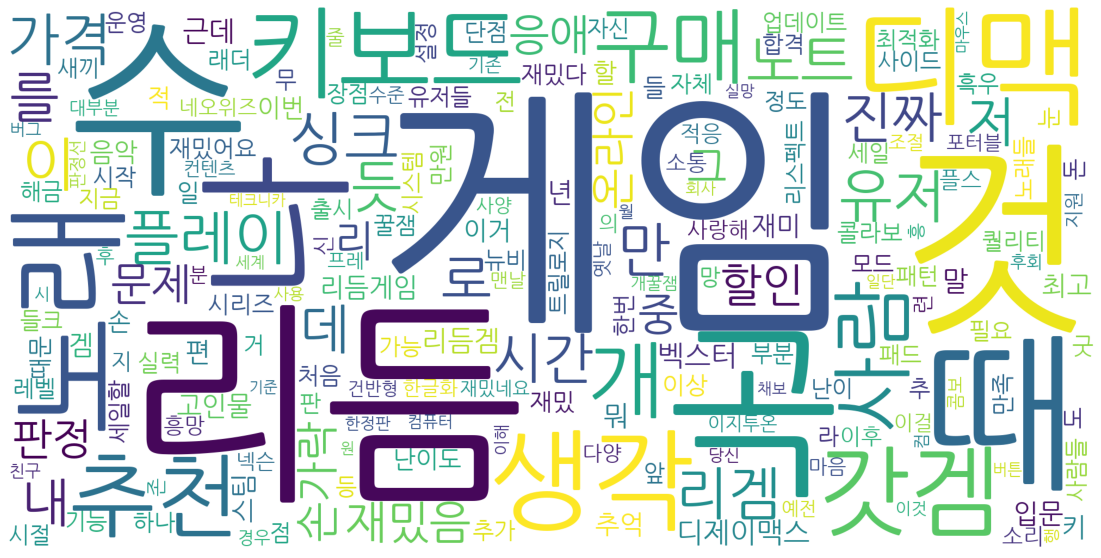

In [35]:
from wordcloud import WordCloud #워드 클라우드 생성
import matplotlib.pyplot as plt
#한글이면 폰트 패치를 반드시 해야한다.
wc = WordCloud(
    font_path=r'C:\Users\student\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf',
    width=2000,
    height=1000,background_color='white'
).generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

<AxesSubplot:title={'center':'Voted Up'}>

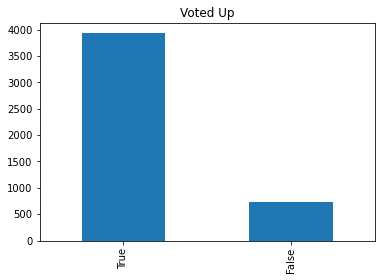

In [36]:
data['voted_up'].value_counts().plot(kind='bar', title='Voted Up')
# 긍정! 부정!

In [37]:
import json

total_playtime = 0
# 제이슨 파일에서 플레이타입 가져옴 #크롤링한 리뷰 숫자만큼
#토탈 플레이타임에 가져온걸 다 더함
for i in range(len(df)):
    playtime = json.loads(data.iloc[i]['author'].replace("\'", "\""))['playtime_forever']

    total_playtime += playtime

print('전체 플레이타임 합계 (분)', total_playtime)
print('전체 플레이타임 합계 (시간)', total_playtime / 60)
print('평균 플레이타임 (시간)', total_playtime / len(df) / 60)

전체 플레이타임 합계 (분) 45158745
전체 플레이타임 합계 (시간) 752645.75
평균 플레이타임 (시간) 161.2697128776516


In [50]:
data['voted_up'].value_counts('True')*100

True     84.186844
False    15.813156
Name: voted_up, dtype: float64